# Final Project

# Amazon e-book review

## Topic Modeling

In [2]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

ERROR: Invalid requirement: '#visualizing'


Processing c:\users\18516\appdata\local\pip\cache\wheels\11\86\38\0554afea46105c70bae8d223c427bba371aa0c83ce88d57b27\html_parser-0.2-py3-none-any.whl


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18516\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18516\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\18516\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18516\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [3]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [4]:
df = pd.read_csv("cleaned2.csv")
df.head(5)

C:\Users\18516\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,title,rank,cat1,cat2
0,4.0,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,"pretty good story, a little exaggerated, but I...",pretty good story,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
1,5.0,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,"If you've read other max brand westerns, you k...",A very good book,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
2,5.0,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,"Love Max, always a fun twist",Five Stars,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
3,5.0,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,"As usual for him, a good book",a good,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
4,5.0,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,MB is one of the original western writers and ...,A Western,2,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction


In [6]:
import collections
obj = collections.Counter(df.cat2)
obj


Counter({'Literature & Fiction': 1057983,
         'Science Fiction & Fantasy': 138815,
         'Biographies & Memoirs': 9227,
         'Religion & Spirituality': 93640,
         'Romance': 520146,
         'Health, Fitness & Dieting': 36950,
         'Travel': 1668,
         'Mystery, Thriller & Suspense': 123182,
         "Children's eBooks": 46765,
         'Crafts, Hobbies & Home': 7590,
         'Politics & Social Sciences': 4640,
         'Two hours or more (65-100 pages)': 769,
         'History': 9522,
         'Engineering & Transportation': 778,
         'Sports & Outdoors': 3724,
         'Business & Money': 22247,
         'Reference': 3835,
         'Arts & Photography': 5699,
         'Self-Help': 4176,
         'Teen & Young Adult': 64474,
         'Education & Teaching': 3639,
         'Humor & Entertainment': 6707,
         'Computers & Technology': 2944,
         'Cookbooks, Food & Wine': 26200,
         'Comics, Manga & Graphic Novels': 2031,
         '90 minutes (4

In [5]:
travel = df[df.cat2 == 'Travel']
travel_review = np.array(travel['reviewText'])
travel_review

array(["Heartbreaking.  I found this in the library and was thrilled.  Then reality hit.  Similar to Donna Leon's painful essays (don't read them), Mays has evolved into a caricature of a San Francisco snob.  Ms Mayes, buy a mirror, you are the plump ugly tourist you ridiculed throughout the overlong and historically inaccurate diatribe.  Here is the book: Moorish culture good, Jews were happy in servitude, Americans are horrible (other then the Mayes and their friends), Europeans are horrible, but not a horrible as Americans, and good food-unless you have to see Americans whilst eating.",
       "I kept hoping that Ms. Mayes returned to her  'Under the Tuscan Sun' fun, but it won't happen with this judgmental piece. I was appalled at the snobbish attitude that bordered on ignorance. She comes off as not being a happy camper. I skipped whole areas as I became bored.",
       "When I saw this book was being published, I immediately put it on my must-read list. I ordered it and decided t

# Topic Modeling for all reviews

In [27]:
#normalize data
normalized_ebook = normalize_corpus(travel_review)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_ebook = CountVectorizer(max_features=1000)

#vectorize data
bow_ebook = bow_vectorizer_ebook.fit_transform(normalized_ebook)

In [28]:
lda_ebook = LatentDirichletAllocation(n_components=8, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_ebook)
no_top_words_ebooks = 10
display_topics(lda_ebook, bow_vectorizer_ebook.get_feature_names(), no_top_words_ebooks)

Topic 0:
area map city stay good crime use safe author information
Topic 1:
love author enjoy life like write look well character live
Topic 2:
good travel adventure lot fun want really thing think love
Topic 3:
really author well think know like information write interesting happen
Topic 4:
guide city day miss passport place travel itinerary dog vacation
Topic 5:
travel guide great place trip visit information like plan lot
Topic 6:
people experience journey author way travel meet history take different
Topic 7:
life time rv cruise much good thing know many think


Topic Model Visualization

# Topic Model Evaluation

The function CoherenceModel() needs as inputs:

1. Dictionary of the corpus
2. Corpus with each document represented as Bag-of-Words
3. An array of top words for each topic: we'll have top 20 words for each topic

We will now create those objects:

In [31]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101346 sha256=cacae696a8232138056a9abd18deef0051a345f4d841d4d56f71268cf83ad00d
  Stored in directory: c:\users\18516\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


C:\Users\18516\Anaconda3\lib\site-packages\gensim\corpora\dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict
C:\Users\18516\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [32]:
#tokenizing the corpus
ebook_corpus_tokenized = [tokenize_text(normalized_ebook[doc_id]) for doc_id in range(len(normalized_ebook))]

#Dictionary of the corpus:
ebook_dictionary = Dictionary(ebook_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
ebook_bow = [ebook_dictionary.doc2bow(doc) for doc in ebook_corpus_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = bow_vectorizer_ebook, lda_model = lda_ebook, n_words=20)

In [33]:
cm = CoherenceModel(topics=topic_topwords, 
                    corpus = ebook_bow , 
                    dictionary = ebook_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))  # get coherence value

Coherence score for the model:  -2.0847


In [34]:
print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))

Coherence score by topic (higher values are better):  [-2.114  -2.0491 -1.7334 -2.0682 -2.5496 -1.8248 -2.351  -1.9874]


In [36]:
print("Log-Likelihood (higher values are better): ", lda_ebook.score(bow_ebook))

Log-Likelihood (higher values are better):  -320285.3002314658


In [39]:
print("Perplexity (lower values are better): ", lda_ebook.perplexity(bow_ebook))

Perplexity (lower values are better):  602.9684572743625


In [45]:
#fit LDA with 5 topics:
lda_ebook_5_topics = LatentDirichletAllocation(n_components=5, max_iter=100,
                                              doc_topic_prior = 0.25,
                                              topic_word_prior = 0.25).fit(bow_ebook)

#Log-Likelihood
print("Log-Likelihood (higher values are better): ", lda_ebook_5_topics.score(bow_ebook))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_ebook_5_topics.perplexity(bow_ebook))

#coherence score for 5 topics:
topic_topwords_5_topics = get_topic_words(vectorizer = bow_vectorizer_ebook, lda_model = lda_ebook_5_topics, n_words=20)
cm_5_topics = CoherenceModel(topics=topic_topwords_5_topics, 
                             corpus = ebook_bow, 
                             dictionary = ebook_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_5_topics.get_coherence(), 5))  

Log-Likelihood (higher values are better):  -318929.1567070024
Perplexity (lower values are better):  586.8435614847289
Coherence score for the model: (higher values are better) -1.92704


In [43]:
#fit LDA with 4 topics:
lda_ebook_4_topics = LatentDirichletAllocation(n_components=4, max_iter=100,
                                              doc_topic_prior = 0.25,
                                              topic_word_prior = 0.25).fit(bow_ebook)

#Log-Likelihood
print("Log-Likelihood (higher values are better): ", lda_ebook_4_topics.score(bow_ebook))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_ebook_4_topics.perplexity(bow_ebook))

#coherence score for 5 topics:
topic_topwords_4_topics = get_topic_words(vectorizer = bow_vectorizer_ebook, lda_model = lda_ebook_4_topics, n_words=20)
cm_4_topics = CoherenceModel(topics=topic_topwords_4_topics, 
                             corpus = ebook_bow, 
                             dictionary = ebook_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_4_topics.get_coherence(), 4))  

Log-Likelihood (higher values are better):  -318018.32541314163
Perplexity (lower values are better):  576.2563286461774
Coherence score for the model: (higher values are better) -2.0027


In [44]:
#fit LDA with 6 topics:
lda_ebook_6_topics = LatentDirichletAllocation(n_components=6, max_iter=100,
                                              doc_topic_prior = 0.25,
                                              topic_word_prior = 0.25).fit(bow_ebook)

#Log-Likelihood
print("Log-Likelihood (higher values are better): ", lda_ebook_6_topics.score(bow_ebook))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_ebook_6_topics.perplexity(bow_ebook))

#coherence score for 5 topics:
topic_topwords_6_topics = get_topic_words(vectorizer = bow_vectorizer_ebook, lda_model = lda_ebook_6_topics, n_words=20)
cm_6_topics = CoherenceModel(topics=topic_topwords_6_topics, 
                             corpus = ebook_bow, 
                             dictionary = ebook_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_6_topics.get_coherence(), 5))  

Log-Likelihood (higher values are better):  -318626.23827783606
Perplexity (lower values are better):  583.3011139121994
Coherence score for the model: (higher values are better) -2.63422


# Compare different models with different topics. 5-topic has the best performance.
See which dominant 5 topics.

In [48]:
no_top_words_ebooks = 10
display_topics(lda_ebook_5_topics, bow_vectorizer_ebook.get_feature_names(), no_top_words_ebooks)

Topic 0:
travel vacation guide money save day plan reader free know
Topic 1:
picture great child america review disney kid south place world
Topic 2:
travel good lot information think well really great trip author
Topic 3:
author life like love time enjoy write people good way
Topic 4:
guide place visit city information day travel miss list best


In [49]:
word_weights = lda_ebook_5_topics.components_ / lda_ebook_5_topics.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer_ebook.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(5)])
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
travel,0.052598,0.001902,0.036316,0.005010,0.013063
vacation,0.027367,0.000041,0.000021,0.000014,0.005147
guide,0.022671,0.001004,0.005943,0.000014,0.033371
money,0.021852,0.000041,0.001406,0.000300,0.000559
save,0.020748,0.000041,0.000021,0.000014,0.000029
day,0.014494,0.000041,0.000021,0.002936,0.014355
plan,0.013281,0.000042,0.005035,0.000014,0.010521
reader,0.013197,0.001584,0.002488,0.003292,0.000031
free,0.011796,0.002695,0.003989,0.001105,0.000030
know,0.011529,0.009620,0.005283,0.006587,0.007369


In [51]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_ebook_5_topics, bow_ebook, bow_vectorizer_ebook, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  35.751641
2       51.163364 -159.968018       2        1  24.327138
4      -73.144554   21.523815       3        1  17.130100
1      -66.410133 -110.606438       4        1  12.463251
0       54.417324   12.443444       5        1  10.327869, topic_info=         Term        Freq       Total Category  logprob  loglift
912    travel  927.000000  927.000000  Default  30.0000  30.0000
380     guide  481.000000  481.000000  Default  29.0000  29.0000
951     visit  330.000000  330.000000  Default  28.0000  28.0000
657     place  416.000000  416.000000  Default  27.0000  27.0000
939  vacation  186.000000  186.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
185   country   38.276240  153.725609   Topic5  -4.9052   0.8800
563      miss   37.618174  148.332117   Topic5  -4.9226   0.8984
958      want   41.988271  341.942951   Topic5  -4.8127   0.1731
394      help   37.579583  166.741788   Topic5  -4.9236   0.7803
966       way   37.519385  281.607719   Topic5  -4.9252   0.2547

[345 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4         3  0.265679  accommodation
4         5  0.708478  accommodation
5         1  0.975343        account
7         3  0.058916         active
7         4  0.883738         active
...     ...       ...            ...
990       4  0.044180        writing
996       1  0.132073           york
996       2  0.088049           york
996       3  0.770426           york
998       1  0.938705        zealand

[602 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

# Find Dominant Topic in a Document

In [54]:
lda_ebook_topic_weights = lda_ebook_5_topics.transform(bow_ebook)
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_ebook))]
topic_names = ["Topic_" + str(i) for i in range(5)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_ebook_topic_weights, 5), columns=topic_names, index=doc_names)

#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic

travel['dominant_topic'] = dominant_topic
travel.head(5)


C:\Users\18516\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,title,rank,cat1,cat2,dominant_topic
488,2.0,False,2016-03-06,A2I1R83M670CND,B000GCFCNC,Heartbreaking. I found this in the library an...,Heartbreakingly BAD,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,3
489,5.0,True,2013-04-22,A1GR0ICQPG5KF6,B000GCFCNC,I kept hoping that Ms. Mayes returned to her ...,Maye's whirlwind trips,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,3
490,4.0,False,2011-12-10,A1E2NA2F4RTQ9B,B000GCFCNC,"When I saw this book was being published, I im...",Perfect summer read,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,3
491,2.0,False,2009-01-18,A2Y38XC6CQYD1I,B000GCFCNC,I have never read any of Ms. Mayes previous bo...,Tedious at best,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,3
492,2.0,False,2007-01-03,A3R9X003XW0LNR,B000GCFCNC,"As with many of the other reviewers, I loved U...",Overdosed on food,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,3


# Name each topic

In [132]:
travel['dominant_topic'].replace({0: 'Money-saving travel guide', 1: 'Kid-friendly place review', \
                                   2: 'Informative travel book', 3: "Author's travel story" , 4:"Travel list for a city visit" },inplace = True)
travel.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,title,rank,cat1,cat2,dominant_topic
488,2.0,False,2016-03-06,A2I1R83M670CND,B000GCFCNC,Heartbreaking. I found this in the library an...,Heartbreakingly BAD,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,Author's travel story
489,5.0,True,2013-04-22,A1GR0ICQPG5KF6,B000GCFCNC,I kept hoping that Ms. Mayes returned to her ...,Maye's whirlwind trips,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,Author's travel story
490,4.0,False,2011-12-10,A1E2NA2F4RTQ9B,B000GCFCNC,"When I saw this book was being published, I im...",Perfect summer read,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,Author's travel story
491,2.0,False,2009-01-18,A2Y38XC6CQYD1I,B000GCFCNC,I have never read any of Ms. Mayes previous bo...,Tedious at best,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,Author's travel story
492,2.0,False,2007-01-03,A3R9X003XW0LNR,B000GCFCNC,"As with many of the other reviewers, I loved U...",Overdosed on food,0,NaN,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel,Author's travel story


# Find their favourite topic for each buyer.

In [133]:
import collections
obj = collections.Counter(travel.dominant_topic)
obj

Counter({"Author's travel story": 742,
         'Informative travel book': 444,
         'Kid-friendly place review': 168,
         'Travel list for a city visit': 197,
         'Money-saving travel guide': 117})

Find the reviews they leave for each topic, get the top topics for each buyer, and send personalized recommedation to them.

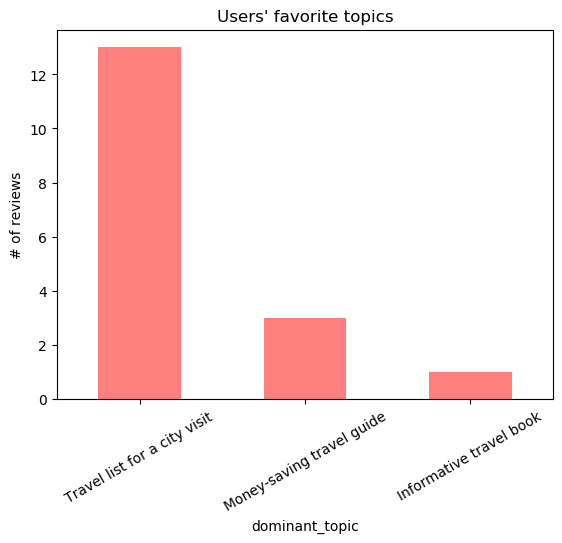

In [157]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
def user_topics(userid):
    userhis = travel[travel.reviewerID==userid]
    topic_sum = userhis.groupby('dominant_topic').asin.count()
    topic_sum_desc = topic_sum.sort_values(ascending=False)
    p = topic_sum_desc.plot(kind='bar', color='r', alpha=0.5)
    p.set_ylabel('# of reviews')
    p.set_title("Users' favorite topics")
    plt.xticks(rotation=30
    return plt.show()
user_topics('AKB7874TUQD')

Example: For the top buyer in travel book category, find his favorite topic is informative travel book.

In [67]:
obj = collections.Counter(travel.reviewerID)
obj.most_common()

[('A1ESF76N9NLS0P', 17),
 ('AKB7874TUQD', 17),
 ('A2EESF6O3CAPXT', 17),
 ('A2F8W9DY2LTMYA', 16),
 ('A11P4DJ7IXP9KI', 15),
 ('A1FEHQ57WCOFO8', 14),
 ('A318NUC0L8RMP9', 13),
 ('A32A056Q9OYP7D', 7),
 ('A1WK64OV93G9TA', 6),
 ('A2WG33SBOT901X', 5),
 ('A2334FRXTW3DN3', 5),
 ('A3GSSX9XHONVCD', 5),
 ('AXIO51VZN815F', 5),
 ('A3BG7Q6NNZCEGP', 4),
 ('A2XXHJ01G2NLS7', 4),
 ('A2CE7EN4TBTG38', 4),
 ('A2NHFTXXPAS3N6', 4),
 ('A2QTU2KUPIS6LN', 4),
 ('A39529JJJEEDP5', 4),
 ('A20B2C63JX0082', 4),
 ('AE4RENZ3VSFCZ', 4),
 ('A1RL0VMJVV8Q9N', 4),
 ('A2H587O1MJCEL9', 3),
 ('A2MWPO4O9Z8B1Z', 3),
 ('A281NPSIMI1C2R', 3),
 ('A37PV5GMP2ILJC', 3),
 ('A2VV2MISGXFY1O', 3),
 ('A3BLRIGTH5H3M6', 3),
 ('A3VP3JOYGOBOMH', 3),
 ('A2VYVIDRJX20SI', 3),
 ('A2D1LPEUCTNT8X', 3),
 ('A3FNMBQOB49S6K', 3),
 ('AWP9X5YWRGP0Y', 3),
 ('ABN07FZM1HNYF', 3),
 ('A3FA0RACII84DP', 3),
 ('A17GQ75HS51952', 3),
 ('A33W5CVYPB8ENS', 3),
 ('A122MJDH0RA2Q3', 3),
 ('A29Y4VNJA2NXIV', 3),
 ('A3EYQGZZ9MMBHB', 3),
 ('A1PRHYPRXQ3B7I', 3),
 ('A5DR48ZM37V5Z

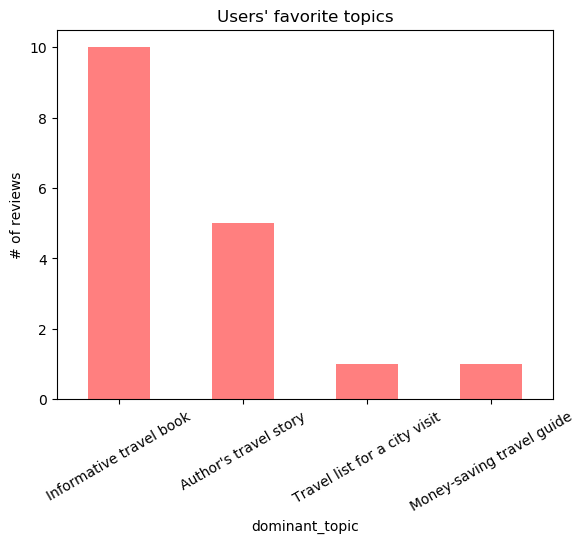

In [151]:
userhis = travel[travel.reviewerID=='A1ESF76N9NLS0P']
topic_sum = userhis.groupby('dominant_topic').asin.count()
topic_sum_desc = topic_sum.sort_values(ascending=False)
topic_sum_desc
p = topic_sum_desc.plot(kind='bar', color='r', alpha=0.5)
p.set_ylabel('# of reviews')
p.set_title("Users' favorite topics")
plt.xticks(rotation=30)
plt.show()

In [156]:
travel.to_csv("C:/Users/18516/2020Spring_Text Mining/Final/travel_topic_modelling.csv")